In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

N = 2**8
n = 9

X = np.random.normal(0, 6, (N, n))

lambda_value = 0.0391

K = 15
p = np.arange(-7, 8, 1)

a0 = 1.3
f = [
    lambda x: x / 3,
    lambda x: (x / 7)**2,
    lambda x: (x / 8)**3,
    lambda x: np.sin(x / 10 * np.pi),
    lambda x: np.log(np.abs(x + 13)) - 2.56494935746154,
    lambda x: (np.abs(x) / 8)**3.2 - (x / 8)**4,
    lambda x: np.abs(x / 5),
    lambda x: np.log(np.exp(x) + np.exp((x / 5)**2)) / 5 - 0.138629436111989,
    lambda x: np.exp(x / 10) - 1
]

# Y = alpha + sum fj(Xj) + eps
y = a0 * np.ones(N)
for j in range(n):
    y += f[j](X[:, j])
y += np.random.normal(0, 1, N)

In [3]:
Z = X.copy()
for i in range(K):
    Z = np.hstack((Z, np.maximum(X-p[i], 0) + np.minimum(p[i], 0)))

theta = cp.Variable(n*(K+1))
alpha = cp.Variable(1)

C = cp.norm(theta, 1)
f0 = 1/N*cp.sum_squares(y - alpha - Z@theta)

prob = cp.Problem(cp.Minimize(f0 + lambda_value*C), [])
prob.solve()

1.3296763512671423

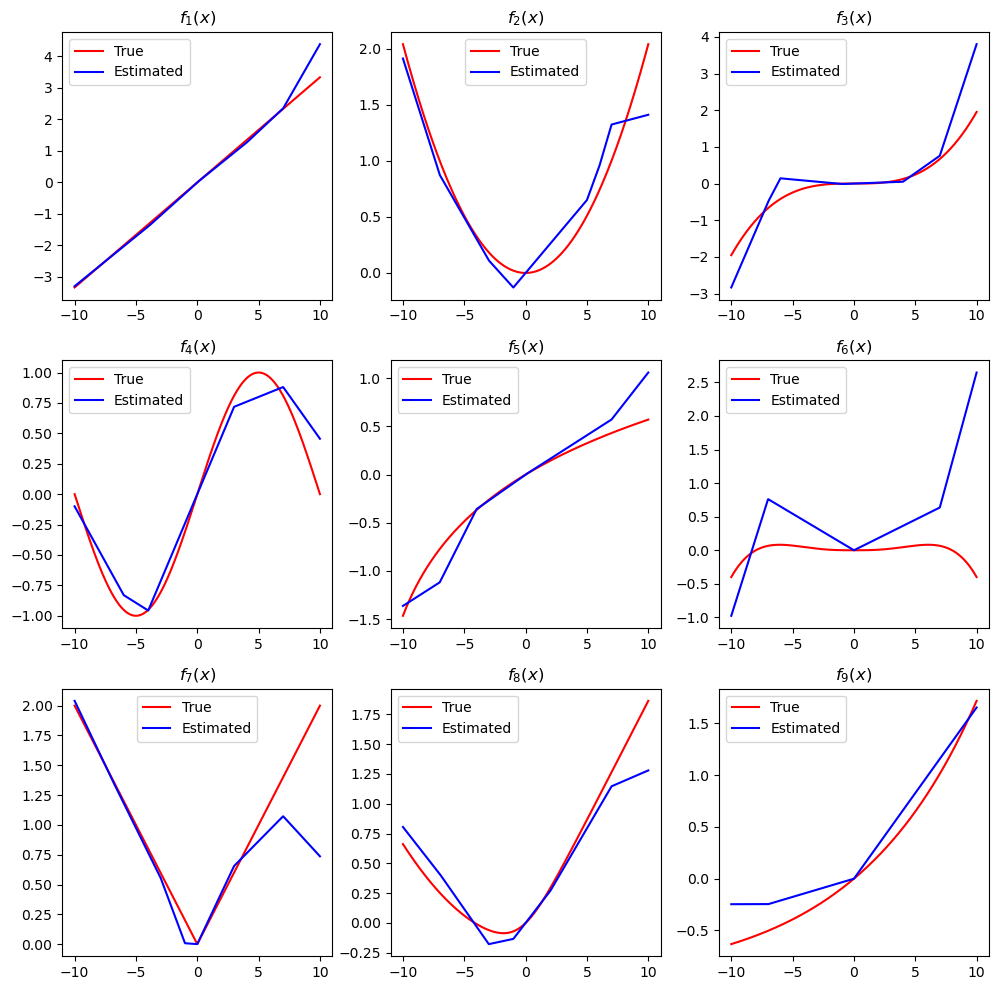

In [98]:
# Plotting the functions
x = np.linspace(-10, 10, 1024)
yy = np.zeros((n, 1024))
plt.figure(figsize=(10, 10))
for j in range(n):
    yy[j, :] = theta.value[j]*x
    for i in range(K):
        yy[j, :] += theta.value[i*n+j] * (np.maximum(x-p[i-1], 0) + np.minimum(p[i-1], 0))
    plt.subplot(3, 3, j + 1)
    plt.plot(x, f[j](x), 'r', label='True')
    plt.plot(x, yy[j, :], 'b', label='Estimated')
    plt.title(f'$f_{j+1}(x)$')
    plt.legend()

plt.tight_layout()
plt.savefig('gen_add_regr_fit', bbox_inches='tight')
plt.show()

In [5]:
f0.value

0.9696239317744478

In [92]:
(cp.sqrt(cp.sum_squares(y - alpha - Z@theta)) / cp.sqrt(N)).value

0.9846948419558457

In [91]:
(cp.sqrt(cp.sum_squares(y)) / cp.sqrt(N)).value

4.644153382064116

In [93]:
0.9846948419558457 / 4.644153382064116

0.2120289234543312